<h1>Импорт библиотек

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:
def sum_prod(X, V):

    total_sum = 0
    for i in range(len(X)):
        total_sum += np.dot(X[i], V[i])
    return total_sum

class TestSumProd(unittest.TestCase):

    def test_sum_prod_empty(self):
        X = []
        V = []
        expected_result = 0
        self.assertEqual(sum_prod(X, V), expected_result)

    def test_not_zero_matrix_and_not_zero_vectors(self):
        X = [
        np.array([[1, 2], [3, 4]]),
        np.array([[5, 6], [7, 8]])
        ]

        V = [
        np.array([[1], [1]]),
        np.array([[2], [2]])
        ]

        self.assertTrue(np.array_equal(sum_prod(X, V), np.array([[25], [37]])))

    def test_zero_matrix_and_not_zero_vectors(self):
        X = [
        np.array([[0, 0], [0, 0]]),
        np.array([[0, 0], [0, 0]])
        ]

        V = [
        np.array([[1], [1]]),
        np.array([[2], [2]])
        ]

        self.assertTrue(np.array_equal(sum_prod(X, V), np.array([[0], [0]])))

    def test_not_zero_matrix_and_zero_vectors(self):
        X = [
        np.array([[1, 2], [3, 4]]),
        np.array([[5, 6], [7, 8]])
        ]

        V = [
        np.array([[0], [0]]),
        np.array([[0], [0]])
        ]

        self.assertTrue(np.array_equal(sum_prod(X, V), np.array([[0], [0]])))


unittest.main(argv=[''], verbosity=2, exit=False)

test_even_dimensions (__main__.TestChessFunction.test_even_dimensions) ... ok
test_odd_dimensions (__main__.TestChessFunction.test_odd_dimensions) ... ok
test_not_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_not_zero_vectors) ... ok
test_not_zero_matrix_and_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_zero_vectors) ... ok
test_sum_prod_empty (__main__.TestSumProd.test_sum_prod_empty) ... ok
test_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_zero_matrix_and_not_zero_vectors) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.008s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold=0.5):

    binarized_matrix = [[1 if el > threshold else 0 for el in row] for row in M]
    return binarized_matrix

class TestBinarizeFunction(unittest.TestCase):
    def test_binarize_default_threshold(self):
        M = [[0.1, 0.6, 0.3],
             [0.7, 0.2, 0.9]]
        expected_result = [[0, 1, 0],
                           [1, 0, 1]]
        self.assertEqual(binarize(M), expected_result)

    def test_binarize_custom_threshold(self):
        M = [[0.1, 0.6, 0.3],
             [0.7, 0.2, 0.9]]
        threshold = 0.7
        expected_result = [[0, 0, 0],
                           [0, 0, 1]]
        self.assertEqual(binarize(M, threshold), expected_result)

    def test_binarize_empty_matrix(self):
        M = []
        self.assertEqual(binarize(M), [])

    def test_binarize_negative_values(self):
        M = [[-0.1, 0.6, -0.3],
             [0.7, -0.2, 0.9]]
        expected_result = [[0, 1, 0],
                           [1, 0, 1]]
        self.assertEqual(binarize(M), expected_result)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_binarize_custom_threshold (__main__.TestBinarizeFunction.test_binarize_custom_threshold) ... ok
test_binarize_default_threshold (__main__.TestBinarizeFunction.test_binarize_default_threshold) ... ok
test_binarize_empty_matrix (__main__.TestBinarizeFunction.test_binarize_empty_matrix) ... ok
test_binarize_negative_values (__main__.TestBinarizeFunction.test_binarize_negative_values) ... ok
test_even_dimensions (__main__.TestChessFunction.test_even_dimensions) ... ok
test_odd_dimensions (__main__.TestChessFunction.test_odd_dimensions) ... ok
test_not_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_not_zero_vectors) ... ok
test_not_zero_matrix_and_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_zero_vectors) ... ok
test_sum_prod_empty (__main__.TestSumProd.test_sum_prod_empty) ... ok
test_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_zero_matrix_and_not_zero_vectors) ... ok

-----------------------------------------------------

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    unique_row_elements = [set(row) for row in mat]
    return [list(row) for row in unique_row_elements]

def unique_columns(mat):
    unique_col_elements = [set(col) for col in zip(*mat)]
    return [list(col) for col in unique_col_elements]

class TestUniqueRows(unittest.TestCase):

    def test_empty_matrix(self):
        mat = []
        result = unique_rows(mat)
        self.assertEqual(result, [])

    def test_single_row_matrix(self):
        mat = [[1, 2, 2]]
        result = unique_rows(mat)
        self.assertEqual(result, [[1, 2]])

    def test_multiple_rows_matrix(self):
        mat = [[1, 2, 3], [2, 3, 4], [1, 3, 5]]
        result = unique_rows(mat)
        self.assertEqual(result, [[1, 2, 3], [2, 3, 4], [1, 3, 5]])

class TestUniqueColumns(unittest.TestCase):

    def test_empty_matrix(self):
        mat = []
        result = unique_columns(mat)
        self.assertEqual(result, [])

    def test_single_column_matrix(self):
        mat = [[1], [2], [2]]
        result = unique_columns(mat)
        self.assertEqual(result, [[1, 2]])

    def test_multiple_columns_matrix(self):
        mat = [[1, 2, 3], [2, 3, 4], [1, 3, 5]]
        result = unique_columns(mat)
        self.assertEqual(result, [[1, 2], [2, 3], [3, 4, 5]])

unittest.main(argv=[''], verbosity=2, exit=False)

test_binarize_custom_threshold (__main__.TestBinarizeFunction.test_binarize_custom_threshold) ... ok
test_binarize_default_threshold (__main__.TestBinarizeFunction.test_binarize_default_threshold) ... ok
test_binarize_empty_matrix (__main__.TestBinarizeFunction.test_binarize_empty_matrix) ... ok
test_binarize_negative_values (__main__.TestBinarizeFunction.test_binarize_negative_values) ... ok
test_even_dimensions (__main__.TestChessFunction.test_even_dimensions) ... ok
test_odd_dimensions (__main__.TestChessFunction.test_odd_dimensions) ... ok
test_not_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_not_zero_vectors) ... ok
test_not_zero_matrix_and_zero_vectors (__main__.TestSumProd.test_not_zero_matrix_and_zero_vectors) ... ok
test_sum_prod_empty (__main__.TestSumProd.test_sum_prod_empty) ... ok
test_zero_matrix_and_not_zero_vectors (__main__.TestSumProd.test_zero_matrix_and_not_zero_vectors) ... ok
test_empty_matrix (__main__.TestUniqueColumns.test_emp

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

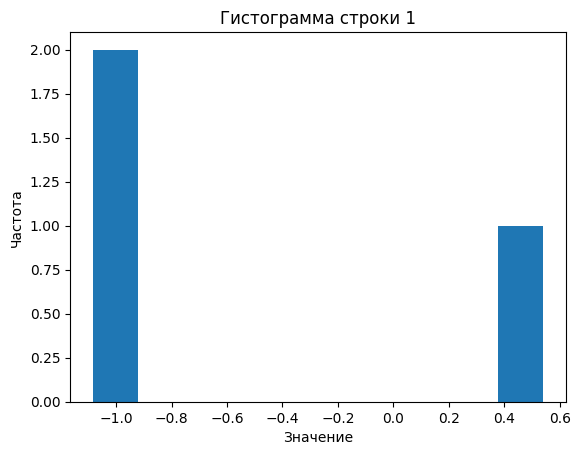

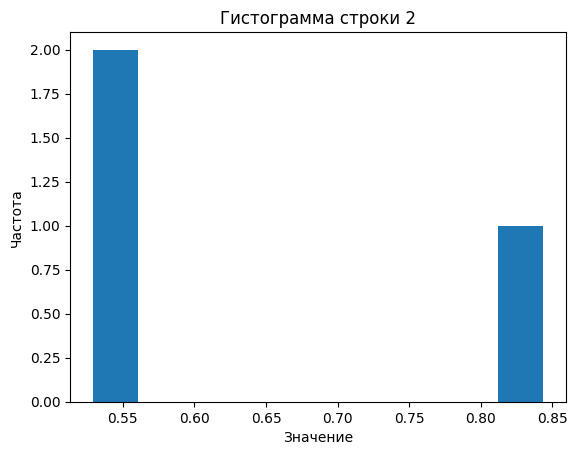

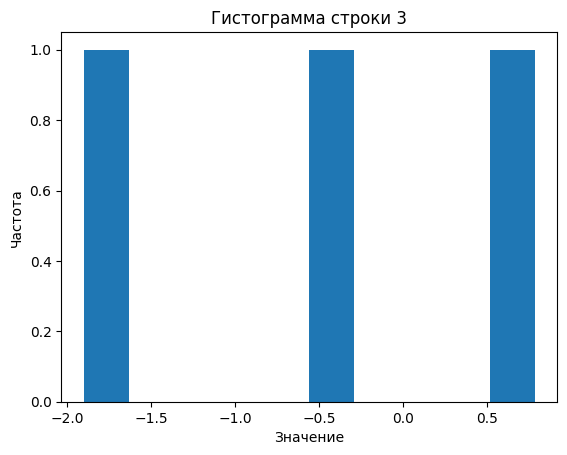

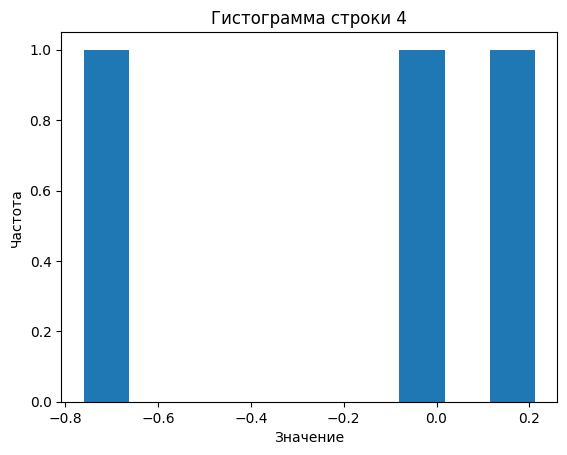

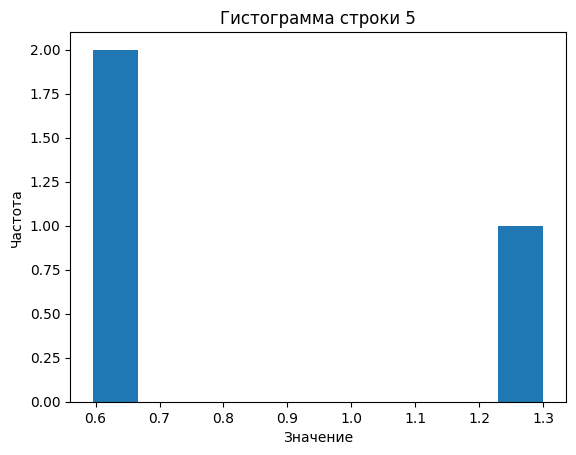

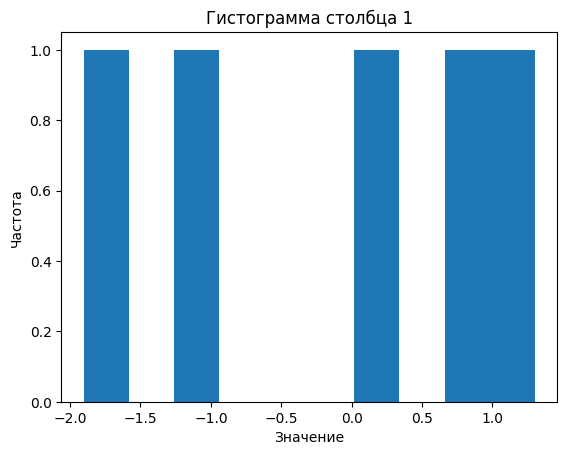

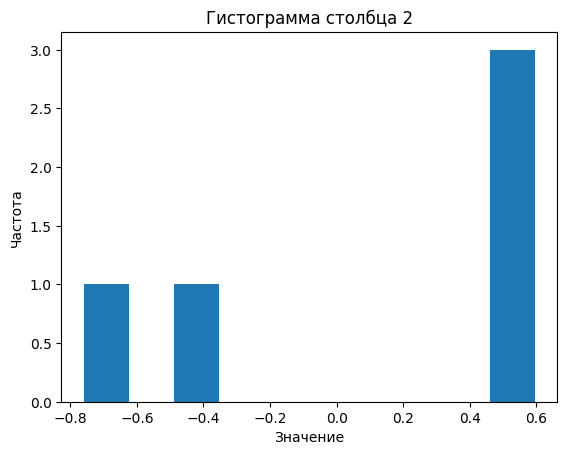

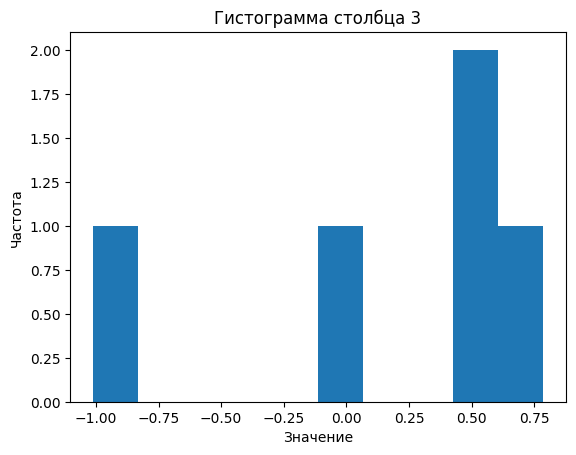

Матрица:
[[-1.08469471  0.54113794 -1.01324669]
 [ 0.84380715  0.52881412  0.55009546]
 [-1.90262364 -0.41988209  0.78681132]
 [ 0.21149343 -0.75956338 -0.01970902]
 [ 1.30059027  0.59524236  0.59910249]]

Мат. ожидание строк:
[-0.51893449  0.64090558 -0.51189814 -0.18925966  0.83164504]

Дисперсия строк:
[0.56272758 0.02066001 1.20974355 0.17153226 0.1099573 ]

Мат. ожидание столбцов:
[-0.1262855   0.09714979  0.18061071]

Дисперсия столбцов:
[1.43301485 0.32656704 0.4289114 ]


In [8]:
def generate_matrix_and_stats(m, n):
    # создаем матрицу
    matrix = np.random.randn(m, n)

    # мат. ожидание и дисперсию для строк
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    # мат. ожидание и дисперсию для столбцов
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    # гистограммы для строк
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i, :])
        plt.title(f"Гистограмма строки {i+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")
        plt.show()

    # гистограммы для столбцов
    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j])
        plt.title(f"Гистограмма столбца {j+1}")
        plt.xlabel("Значение")
        plt.ylabel("Частота")
        plt.show()

    return matrix, row_means, row_variances, col_means, col_variances

# пример 
m = 5
n = 3
matrix, row_means, row_variances, col_means, col_variances = generate_matrix_and_stats(m, n)

print("Матрица:")
print(matrix)

print("\nМат. ожидание строк:")
print(row_means)

print("\nДисперсия строк:")
print(row_variances)

print("\nМат. ожидание столбцов:")
print(col_means)

print("\nДисперсия столбцов:")
print(col_variances)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [3]:
def chess(m, n, a, b):
    matrix = []
    for i in range(m):
        row = []
        for j in range(n):
            if (i + j) % 2 == 0:
                row.append(a)
            else:
                row.append(b)
        matrix.append(row)
    return matrix

class TestChessFunction(unittest.TestCase):
    def test_even_dimensions(self):
        result = chess(4, 4, 1, 0)
        expected = [[1, 0, 1, 0],
                    [0, 1, 0, 1],
                    [1, 0, 1, 0],
                    [0, 1, 0, 1]]
        self.assertEqual(result, expected)

    def test_odd_dimensions(self):
        result = chess(3, 5, "X", "O")
        expected = [["X", "O", "X", "O", "X"],
                    ["O", "X", "O", "X", "O"],
                    ["X", "O", "X", "O", "X"]]
        self.assertEqual(result, expected)

unittest.main(argv=[''], verbosity=2, exit=False)

test_even_dimensions (__main__.TestChessFunction.test_even_dimensions) ... ok
test_odd_dimensions (__main__.TestChessFunction.test_odd_dimensions) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

test_even_dimensions (__main__.TestChessFunction.test_even_dimensions) ... ok
test_odd_dimensions (__main__.TestChessFunction.test_odd_dimensions) ... ok
test_draw_ellipse (__main__.TestDrawingFunctions.test_draw_ellipse) ... Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


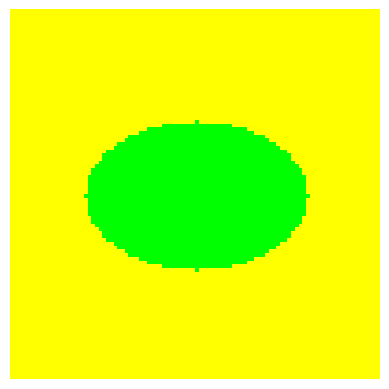

ok
test_draw_rectangle (__main__.TestDrawingFunctions.test_draw_rectangle) ... Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


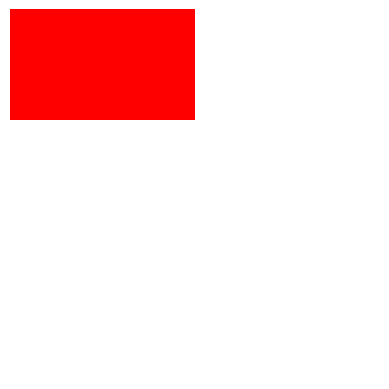

ok

----------------------------------------------------------------------
Ran 4 tests in 0.109s

OK


In [20]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3)) * background_color
    image[:a, :b] = rectangle_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3)) * background_color
    x_range = np.arange(m)
    y_range = np.arange(n)
    xx, yy = np.meshgrid(x_range, y_range)
    ellipse = ((xx - m//2)**2 / a**2 + (yy - n//2)**2 / b**2 <= 1).astype(int)
    image[ellipse == 1] = ellipse_color
    plt.imshow(image)
    plt.axis('off')
    plt.show()


class TestDrawingFunctions(unittest.TestCase):

    def test_draw_rectangle(self):
        draw_rectangle(30, 50, 100, 100, (255, 0, 0), (255, 255, 255))

    def test_draw_ellipse(self):
        draw_ellipse(30, 20, 100, 100, (0, 255, 0), (255, 255, 0))

unittest.main(argv=[''], verbosity=2, exit=False)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [2]:
def calculate_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    return mean, variance, std_dev

def find_local_extrema(time_series):
    local_maxima = []
    local_minima = []
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append((i, time_series[i]))
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append((i, time_series[i]))
    return local_maxima, local_minima

def moving_average(time_series, window_size):
    moving_avg = []
    for i in range(len(time_series) - window_size + 1):
        window = time_series[i:i + window_size]
        avg = np.mean(window)
        moving_avg.append(avg)
    return moving_avg

# пример
time_series = [3, 6, 8, 10, 7, 3, 5, 9, 11, 8, 5, 3]
mean, variance, std_dev = calculate_statistics(time_series)
print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("Стандартное отклонение:", std_dev)

local_maxima, local_minima = find_local_extrema(time_series)
print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)

window_size = 3
moving_avg_series = moving_average(time_series, window_size)
print("Ряд скользящего среднего с окном размером", window_size, ":", moving_avg_series)


Математическое ожидание: 6.5
Дисперсия: 7.083333333333333
Стандартное отклонение: 2.661453237111885
Локальные максимумы: [(3, 10), (8, 11)]
Локальные минимумы: [(5, 3)]
Ряд скользящего среднего с окном размером 3 : [5.666666666666667, 8.0, 8.333333333333334, 6.666666666666667, 5.0, 5.666666666666667, 8.333333333333334, 9.333333333333334, 8.0, 5.333333333333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [17]:
def one_hot_encode(labels):
  num_classes = np.max(labels) + 1  
  encoded = np.zeros((len(labels), num_classes), dtype=int) 
  encoded[np.arange(len(labels)), labels] = 1  
  return encoded